In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
str = ['Aave','BinanceCoin','Bitcoin','Cardano','ChainLink','Cosmos','CryptocomCoin','Dogecoin',
       'EOS','Ethereum','Iota','Litecoin','Monero','NEM','Polkadot','Solana','Stellar']
df = pd.read_csv(f'dataset/coin/coin_{str[0]}.csv')
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.11,49.79,52.68,53.22,0.00,"89,128,128.86"
1,2,Aave,AAVE,2020-10-06 23:59:59,53.40,40.73,53.29,42.40,"583,091.46","71,011,441.25"
2,3,Aave,AAVE,2020-10-07 23:59:59,42.41,35.97,42.40,40.08,"682,834.19","67,130,036.90"
3,4,Aave,AAVE,2020-10-08 23:59:59,44.90,36.70,39.89,43.76,"1,658,816.92","220,265,142.11"
4,5,Aave,AAVE,2020-10-09 23:59:59,47.57,43.29,43.76,46.82,"815,537.66","235,632,208.16"
...,...,...,...,...,...,...,...,...,...,...
270,271,Aave,AAVE,2021-07-02 23:59:59,234.48,215.95,230.81,233.95,"256,639,522.76","3,001,542,331.19"
271,272,Aave,AAVE,2021-07-03 23:59:59,265.11,228.49,234.21,259.66,"385,377,799.45","3,331,546,057.40"
272,273,Aave,AAVE,2021-07-04 23:59:59,289.00,248.29,259.40,277.04,"427,571,943.31","3,555,054,096.37"
273,274,Aave,AAVE,2021-07-05 23:59:59,317.39,263.43,277.11,307.83,"793,140,860.06","3,950,268,561.44"


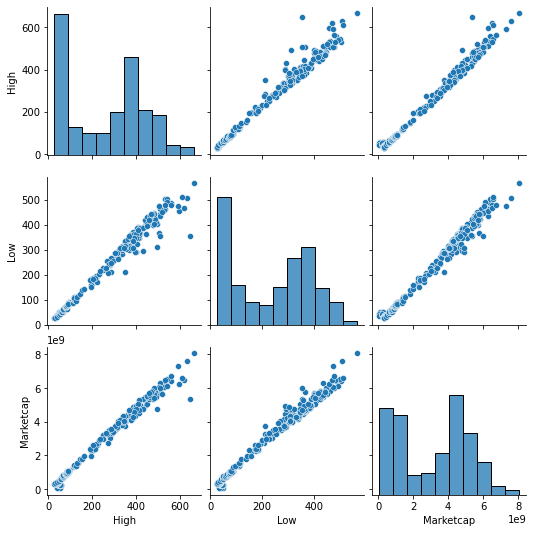

In [208]:
# 높고 낮은 가치와 시가총액의 상관관계
sns.pairplot(df[['High', 'Low', 'Marketcap']])

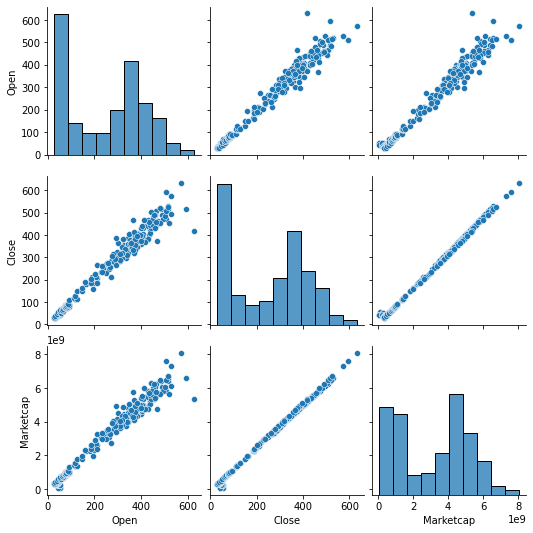

In [210]:
# 시가& 종가와 시가총액의 상관관계
sns.pairplot(df[['Open', 'Close', 'Marketcap']])

# 종가와 시가총액의 상관관계가 매우 높음.
# 상장종목 별로 당일 종가에 상장주식 수를 곱하여 산출한 값이 시가총액이기 때문.

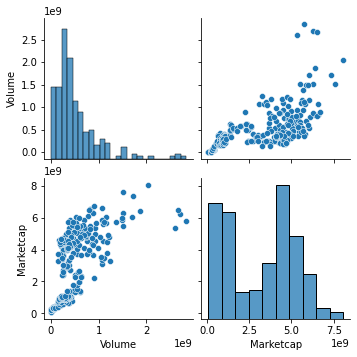

In [211]:
# usd 거래량과 시가총액의 상관관계
sns.pairplot(df[['Volume', 'Marketcap']])

# usd 거래량과 시가총액의 상관관계는 위의 상관관계들보다 상대적으로 낮음.
# 시가총액의 금액이 커질수록 거래량은 줄어듦.

In [202]:
str = ['Aave','BinanceCoin','Bitcoin','Cardano','ChainLink','Cosmos','CryptocomCoin','Dogecoin',
       'EOS','Ethereum','Iota','Litecoin','Monero','NEM','Polkadot','Solana','Stellar']
df = pd.read_csv(f'dataset/coin/coin_{str[0]}.csv')

df_list = []
df_list1 = []
df_list2 = []
for i in range(17):
    df = pd.read_csv(f'dataset/coin/coin_{str[i]}.csv')
    
    # 결측값 확인
#     df.isnull().sum() # null 값 없음
#     df.info()

    # 필요한 컬럼만 추출
    df = df.reindex(['Name','Marketcap'],axis=1)

    # 코인의 시가총액 값을 내림차순으로 정렬.
    df = df.sort_values(['Marketcap'],ascending=False)
    
    # 코인의 시가총액 값이 가장 큰 행만 추출.
    df = df.iloc[0]
    
    # 행과 열 바꾸기
    df = pd.DataFrame(df).transpose()
    
    # 각각의 리스트에 값 추가.
    df_list1.append(df.iloc[0,0])
    df_list2.append(df.iloc[0,1])
    
df_list.append(df_list1)
df_list.append(df_list2)

# 리스트로 출력된 값들을 데이터프레임 형식으로 다시 변환.
df_list = pd.DataFrame(df_list).transpose()
# 칼럼이름 설정
df_list = df_list.rename(columns = {0:'Name',1:'Marketcap'})
# 코인 시가총액 값을 기준으로 내림차순
df_list = df_list.sort_values(['Marketcap'],ascending=False)
df_list

# 인덱스 번호 초기화
df_list = df_list.reset_index(drop = True)
df_list

,Name,Marketcap
0,Bitcoin,"1,186,364,044,140.27"
1,Ethereum,"482,881,900,490.93"
2,Binance Coin,"103,672,165,463.46"
3,Dogecoin,"88,680,824,303.07"
4,Cardano,"73,772,243,227.06"
5,Polkadot,"44,973,584,932.56"
6,Litecoin,"25,796,522,602.14"
7,Chainlink,"21,871,752,692.13"
8,EOS,"17,769,451,250.20"
9,Stellar,"16,854,691,072.30"


In [200]:
# <test>

str = ['Aave','BinanceCoin','Bitcoin','Cardano','ChainLink','Cosmos','CryptocomCoin','Dogecoin',
       'EOS','Ethereum','Iota','Litecoin','Monero','NEM','Polkadot','Solana','Stellar']
df = pd.read_csv(f'dataset/coin/coin_{str[5]}.csv')

df = df.reindex(['Name','Marketcap'],axis=1)
df = df.sort_values(['Marketcap'],ascending=False)
df = df.iloc[0]
    
    # 행과 열 바꾸기
df = pd.DataFrame(df).transpose()
    
df

,Name,Marketcap
785,Cosmos,"6,203,965,905.60"
